## WeathPy Aanlysis
* City max temperature(F) are highly affected by latitude. It will increase with decrease in latitude, which means it gets hotter as we approach the equator. 
* There are no obvious patterns between city humidity/cloudiness city and latitude. In other words, latitude is not the main factor for city humidity and cloudiness. 
* Slight correlation between wind speed(mph) and latitude. Cities with higher latitude are more likely to have higher wind speed.

In [1]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import seaborn as sns #Controlling figure aesthetics-Seanborn
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

643

## Perform API Calls

In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

In [4]:
total = len(cities)
counter = 1

city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_wpeed = []


for city in cities:
    city_replace = city.replace(" ", "%20")
    target_url =  base_url + "&q=" + city_replace
    response = requests.get(target_url).json()
  
    try:  
        print (f'Processing Record {counter} of {total} | {city}')
        print (target_url)
        
        city_name.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_wpeed.append(response['wind']['speed'])
        
    except (KeyError):
        pass

    counter += 1 

print ('-----------------------------')
print ('Data Retrieval Complete')
print ('-----------------------------')

Processing Record 1 of 643 | dikson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fbbbc674201d77fe1e28492e1f61f2e4&q=dikson
Processing Record 2 of 643 | fortuna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fbbbc674201d77fe1e28492e1f61f2e4&q=fortuna
Processing Record 3 of 643 | thompson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fbbbc674201d77fe1e28492e1f61f2e4&q=thompson
Processing Record 4 of 643 | tomohon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fbbbc674201d77fe1e28492e1f61f2e4&q=tomohon
Processing Record 5 of 643 | saskylakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fbbbc674201d77fe1e28492e1f61f2e4&q=saskylakh
Processing Record 6 of 643 | mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fbbbc674201d77fe1e28492e1f61f2e4&q=mataura
Processing Record 7 of 643 | yellowknife
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID

Processing Record 55 of 643 | kloulklubed
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fbbbc674201d77fe1e28492e1f61f2e4&q=kloulklubed
Processing Record 56 of 643 | puerto escondido
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fbbbc674201d77fe1e28492e1f61f2e4&q=puerto%20escondido
Processing Record 57 of 643 | jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fbbbc674201d77fe1e28492e1f61f2e4&q=jamestown
Processing Record 58 of 643 | albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fbbbc674201d77fe1e28492e1f61f2e4&q=albany
Processing Record 59 of 643 | salta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fbbbc674201d77fe1e28492e1f61f2e4&q=salta
Processing Record 60 of 643 | sept-iles
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fbbbc674201d77fe1e28492e1f61f2e4&q=sept-iles
Processing Record 61 of 643 | hays
http://api.openweathermap.org/data/2.5/we

Processing Record 109 of 643 | east london
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fbbbc674201d77fe1e28492e1f61f2e4&q=east%20london
Processing Record 110 of 643 | katsuura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fbbbc674201d77fe1e28492e1f61f2e4&q=katsuura
Processing Record 111 of 643 | jiexiu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fbbbc674201d77fe1e28492e1f61f2e4&q=jiexiu
Processing Record 112 of 643 | rungata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fbbbc674201d77fe1e28492e1f61f2e4&q=rungata
Processing Record 113 of 643 | samarai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fbbbc674201d77fe1e28492e1f61f2e4&q=samarai
Processing Record 114 of 643 | norman wells
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fbbbc674201d77fe1e28492e1f61f2e4&q=norman%20wells
Processing Record 115 of 643 | kingori
http://api.openweathermap.org/data/2.5/

Processing Record 163 of 643 | novyy urgal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fbbbc674201d77fe1e28492e1f61f2e4&q=novyy%20urgal
Processing Record 164 of 643 | mundo nuevo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fbbbc674201d77fe1e28492e1f61f2e4&q=mundo%20nuevo
Processing Record 165 of 643 | kuvandyk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fbbbc674201d77fe1e28492e1f61f2e4&q=kuvandyk
Processing Record 166 of 643 | longonjo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fbbbc674201d77fe1e28492e1f61f2e4&q=longonjo
Processing Record 167 of 643 | grand river south east
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fbbbc674201d77fe1e28492e1f61f2e4&q=grand%20river%20south%20east
Processing Record 168 of 643 | naze
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fbbbc674201d77fe1e28492e1f61f2e4&q=naze
Processing Record 169 of 643 | galveston
http:

Processing Record 218 of 643 | port hedland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fbbbc674201d77fe1e28492e1f61f2e4&q=port%20hedland
Processing Record 219 of 643 | necochea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fbbbc674201d77fe1e28492e1f61f2e4&q=necochea
Processing Record 220 of 643 | ulagan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fbbbc674201d77fe1e28492e1f61f2e4&q=ulagan
Processing Record 221 of 643 | oranjestad
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fbbbc674201d77fe1e28492e1f61f2e4&q=oranjestad
Processing Record 222 of 643 | manuk mangkaw
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fbbbc674201d77fe1e28492e1f61f2e4&q=manuk%20mangkaw
Processing Record 223 of 643 | mrirt
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fbbbc674201d77fe1e28492e1f61f2e4&q=mrirt
Processing Record 224 of 643 | hofn
http://api.openweathermap.org/data/2

Processing Record 272 of 643 | goba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fbbbc674201d77fe1e28492e1f61f2e4&q=goba
Processing Record 273 of 643 | asfi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fbbbc674201d77fe1e28492e1f61f2e4&q=asfi
Processing Record 274 of 643 | laguna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fbbbc674201d77fe1e28492e1f61f2e4&q=laguna
Processing Record 275 of 643 | lufilufi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fbbbc674201d77fe1e28492e1f61f2e4&q=lufilufi
Processing Record 276 of 643 | namatanai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fbbbc674201d77fe1e28492e1f61f2e4&q=namatanai
Processing Record 277 of 643 | los andes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fbbbc674201d77fe1e28492e1f61f2e4&q=los%20andes
Processing Record 278 of 643 | vidim
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APP

Processing Record 326 of 643 | bonavista
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fbbbc674201d77fe1e28492e1f61f2e4&q=bonavista
Processing Record 327 of 643 | castro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fbbbc674201d77fe1e28492e1f61f2e4&q=castro
Processing Record 328 of 643 | caledonia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fbbbc674201d77fe1e28492e1f61f2e4&q=caledonia
Processing Record 329 of 643 | dustlik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fbbbc674201d77fe1e28492e1f61f2e4&q=dustlik
Processing Record 330 of 643 | yakeshi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fbbbc674201d77fe1e28492e1f61f2e4&q=yakeshi
Processing Record 331 of 643 | san-pedro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fbbbc674201d77fe1e28492e1f61f2e4&q=san-pedro
Processing Record 332 of 643 | mogok
http://api.openweathermap.org/data/2.5/weather?units=

Processing Record 380 of 643 | moose factory
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fbbbc674201d77fe1e28492e1f61f2e4&q=moose%20factory
Processing Record 381 of 643 | port lincoln
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fbbbc674201d77fe1e28492e1f61f2e4&q=port%20lincoln
Processing Record 382 of 643 | grand centre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fbbbc674201d77fe1e28492e1f61f2e4&q=grand%20centre
Processing Record 383 of 643 | nata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fbbbc674201d77fe1e28492e1f61f2e4&q=nata
Processing Record 384 of 643 | henties bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fbbbc674201d77fe1e28492e1f61f2e4&q=henties%20bay
Processing Record 385 of 643 | carmen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fbbbc674201d77fe1e28492e1f61f2e4&q=carmen
Processing Record 386 of 643 | tateyama
http://api.openweath

Processing Record 434 of 643 | sao joao da barra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fbbbc674201d77fe1e28492e1f61f2e4&q=sao%20joao%20da%20barra
Processing Record 435 of 643 | mount gambier
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fbbbc674201d77fe1e28492e1f61f2e4&q=mount%20gambier
Processing Record 436 of 643 | palana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fbbbc674201d77fe1e28492e1f61f2e4&q=palana
Processing Record 437 of 643 | atasu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fbbbc674201d77fe1e28492e1f61f2e4&q=atasu
Processing Record 438 of 643 | pakhtakoron
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fbbbc674201d77fe1e28492e1f61f2e4&q=pakhtakoron
Processing Record 439 of 643 | ilulissat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fbbbc674201d77fe1e28492e1f61f2e4&q=ilulissat
Processing Record 440 of 643 | severnyy
http://api.ope

Processing Record 489 of 643 | nipawin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fbbbc674201d77fe1e28492e1f61f2e4&q=nipawin
Processing Record 490 of 643 | salalah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fbbbc674201d77fe1e28492e1f61f2e4&q=salalah
Processing Record 491 of 643 | ayan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fbbbc674201d77fe1e28492e1f61f2e4&q=ayan
Processing Record 492 of 643 | acarau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fbbbc674201d77fe1e28492e1f61f2e4&q=acarau
Processing Record 493 of 643 | kijang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fbbbc674201d77fe1e28492e1f61f2e4&q=kijang
Processing Record 494 of 643 | maxixe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fbbbc674201d77fe1e28492e1f61f2e4&q=maxixe
Processing Record 495 of 643 | sri aman
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fbbb

Processing Record 544 of 643 | emiliano zapata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fbbbc674201d77fe1e28492e1f61f2e4&q=emiliano%20zapata
Processing Record 545 of 643 | ambilobe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fbbbc674201d77fe1e28492e1f61f2e4&q=ambilobe
Processing Record 546 of 643 | cajati
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fbbbc674201d77fe1e28492e1f61f2e4&q=cajati
Processing Record 547 of 643 | buchmany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fbbbc674201d77fe1e28492e1f61f2e4&q=buchmany
Processing Record 548 of 643 | whitecourt
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fbbbc674201d77fe1e28492e1f61f2e4&q=whitecourt
Processing Record 549 of 643 | ghanzi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fbbbc674201d77fe1e28492e1f61f2e4&q=ghanzi
Processing Record 550 of 643 | yumen
http://api.openweathermap.org/data/2.5/

Processing Record 599 of 643 | zhezkazgan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fbbbc674201d77fe1e28492e1f61f2e4&q=zhezkazgan
Processing Record 600 of 643 | kita
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fbbbc674201d77fe1e28492e1f61f2e4&q=kita
Processing Record 601 of 643 | ulladulla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fbbbc674201d77fe1e28492e1f61f2e4&q=ulladulla
Processing Record 602 of 643 | najran
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fbbbc674201d77fe1e28492e1f61f2e4&q=najran
Processing Record 603 of 643 | vanimo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fbbbc674201d77fe1e28492e1f61f2e4&q=vanimo
Processing Record 604 of 643 | gayeri
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fbbbc674201d77fe1e28492e1f61f2e4&q=gayeri
Processing Record 605 of 643 | havre-saint-pierre
http://api.openweathermap.org/data/2.5/weather?units

In [5]:
# create dataframe
city_data_pd = pd.DataFrame({
    "City": city_name,
    'Cloudiness': cloudiness,
    'Country': country,
    'Date': date,
    'Humidity': humidity,
    'Lat': lat,
    'Lng': lng,
    'Max Temp': max_temp,
    'Wind Speed': wind_wpeed
     })

city_data_pd.count()

City          584
Cloudiness    584
Country       584
Date          584
Humidity      584
Lat           584
Lng           584
Max Temp      584
Wind Speed    584
dtype: int64

In [6]:
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Dikson,20,RU,1539067914,99,73.51,80.55,38.17,16.40
1,Fortuna,40,ES,1539066600,67,38.18,-1.13,62.60,4.70
2,Thompson,75,CA,1539064800,68,55.74,-97.86,30.20,4.70
3,Tomohon,40,ID,1539066600,70,1.33,124.84,86.00,8.05
4,Saskylakh,0,RU,1539067914,93,71.97,114.09,40.15,9.80


## Latitude vs Temperature Plot

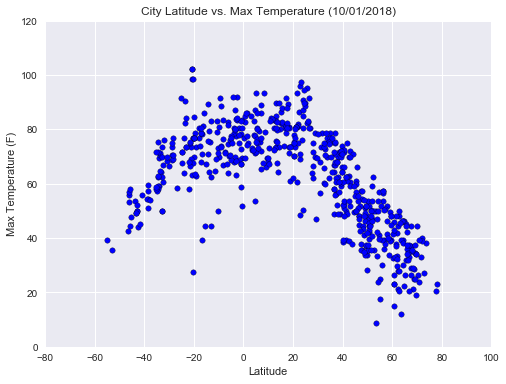

In [7]:
sns.set()

plt.figure(figsize=(8,6))
plt.scatter(city_data_pd['Lat'], city_data_pd['Max Temp'], c='blue', edgecolors='black', s=30)

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature (10/01/2018)')

plt.xlim(-80,100)
plt.ylim(0,120)

plt.savefig('../Plots/Latitude vs Temperature Plot.png', bbox_inches='tight')
plt.show()

## Latitude vs. Humidity Plot

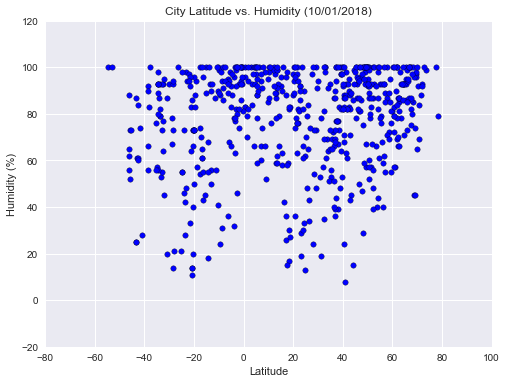

In [8]:
sns.set()

plt.figure(figsize=(8,6))
plt.scatter(city_data_pd['Lat'], city_data_pd['Humidity'], c='blue', edgecolors='black', s=30)

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (10/01/2018)')

plt.xlim(-80,100)
plt.ylim(-20,120)

plt.savefig('../Plots/Latitude vs Humidity Plot.png', bbox_inches='tight')
plt.show()

## Latitude vs. Cloudiness Plot

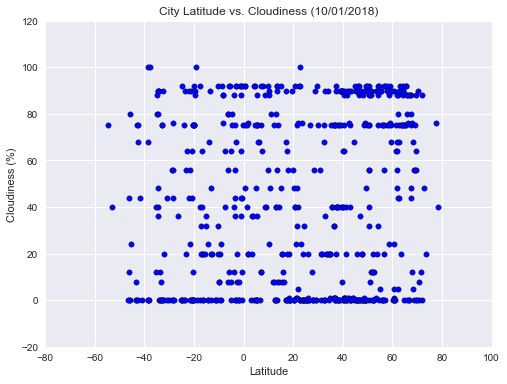

In [9]:
sns.set()

plt.figure(figsize=(8,6))
plt.scatter(city_data_pd['Lat'], city_data_pd['Cloudiness'], c='blue', edgecolors='black', s=30)

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (10/01/2018)')

plt.xlim(-80,100)
plt.ylim(-20,120)

plt.savefig('../Plots/Latitude vs Cloudiness Plot.png', bbox_inches='tight')
plt.show()

## Latitude vs. Wind Speed Plot

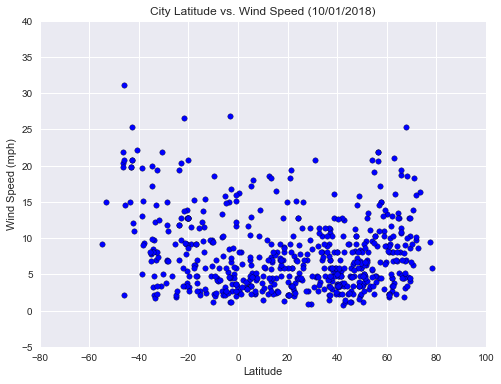

In [10]:
sns.set()

plt.figure(figsize=(8,6))
plt.scatter(city_data_pd['Lat'], city_data_pd['Wind Speed'], c='blue', edgecolors='black', s=30)

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed (10/01/2018)')

plt.xlim(-80,100)
plt.ylim(-5,40)

plt.savefig('../Plots/Latitude vs Wind Speed Plot.png', bbox_inches='tight')
plt.show()